# MA124 Maths by Computer: Assignment 3 
## Part A: Monte Carlo Integration

Student number: 2113104

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

We consider the integral

$$
\int_a^b f(x) \, dx
$$

where $f(x) = -\sin(x)/x$, $a=\pi$ and $b = 4\pi$. Since $\sin(x)/x$ does not have an elementary antiderivative we must use numerical methods to evaluate this integral.

The first method is to multiply the length of interval [a,b] by the mean of this function.

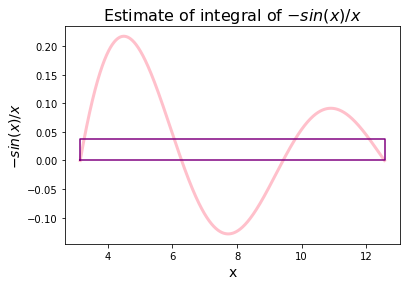

The Monte Carlo estimate for this integral is 0.35875718817258406


In [2]:
#defining a function
def my_fun(x):
    return ((-1)*np.sin(x)/x)

# setting the interval [a,b] and the number of samples
a, b = np.pi, 4*np.pi
N = 1000000

# generating the samples and evaluating f at each 
x = np.random.uniform(a, b, N)
f_of_x = my_fun(x)

# computing the mean and estimating the integral
f_mean = np.mean(f_of_x)
my_integral = (b-a) * f_mean

#plotting
x=np.linspace(np.pi, 4*np.pi, 1001)
plt.plot(x, (-1)*np.sin(x)/x, lw=3, color='pink')
plt.plot([a,b,b,a,a],[0,0,f_mean, f_mean,0],'purple' )
plt.title("Estimate of integral of $-sin(x)/x$", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("$-sin(x)/x$", fontsize=14)
plt.show()

print("The Monte Carlo estimate for this integral is", my_integral)

This plot shows the function $f(x)= -sin(x)/x$ on the interval $ [\pi, 4\pi] $ as well as a rectangular box $[a,b] \times [0,\bar f]$ (where $\bar f$ is the mean of this function).


---
Second method to estimate this integral is to use the fact that $\int_a^b f(x) \, dx = \text{signed area under the curve}$, where "signed under the curve" means the area between the curve $y = f(x)$ and the x axis, taking care of positive and negative contributions to the integral.

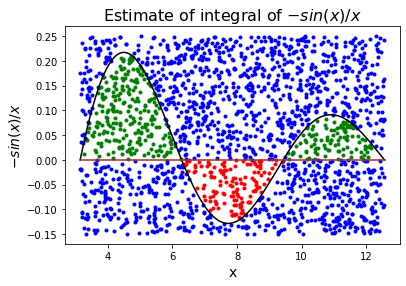

The Monte Carlo estimate for this integral is 0.40526545231308336


In [3]:
# generating the samples
N = 2000
x = np.random.uniform(a, b, N)
y = np.random.uniform(-0.15, 0.25, N)

# setting variables that count the number of samples for various cases
total_minus = 0
total_plus=0
total_0=0
total=0


for i in range(N):
    
    #samples that contribute negatively
    if ((y[i]<0) & (my_fun(x[i])<y[i])):
        total_minus+=1
        plt.plot(x[i],y[i],'.r')
        
    #samples that contribute positively
    elif ((y[i]>0)&(my_fun(x[i])>y[i])):
        total_plus+=1
        plt.plot(x[i],y[i],'.g')
        
    #samles that do not contribute
    else:
        plt.plot(x[i],y[i],'.b')
        total_0+=1
        
#the 'signed' number of samples for Monte Carlo estimate
total=-total_minus+total_plus

#plotting
x1=np.linspace(np.pi, 4*np.pi, 1001)
y1=0*x1
plt.plot(x1, (-1)*np.sin(x1)/x1, color='black')
plt.plot(x1,y1, color='brown')
plt.title("Estimate of integral of $-sin(x)/x$", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("$-sin(x)/x$", fontsize=14)
plt.show()

#the Monte Carlo estimate
print("The Monte Carlo estimate for this integral is",(total/N)*abs(b-a)*0.4)



This plot shows the Monte Carlo estimate for the function $f(x)=-\sin(x)/x$ using the fact that $\int_a^b f(x) \, dx = \text{signed area under the curve}$. 

The green samples show the region that contributes positively to the integral, red-the region that contribute negatively and blue-the region that do not contribute. 
Black line shows the plot of $-sin(x)/x$ and brown the line $y=0$.

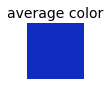

In [4]:
#calculating the percentage of samples of each color
R=total_minus/N
G=total_plus/N
B=total_0/N

#plotting the average color
plt.figure(figsize=(1,1))
plt.title('average color', fontsize=14)
plt.plot(0.5, 0.5, 's', markersize=300, color = (R,G,B))
plt.axis('off')
plt.show()
